In [1]:
import os
import pandas as pd
import numpy as np
import math
from scipy import signal
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D
from numpy import hstack
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [5]:
def split_sequences(sequences, n_steps):
    inputnn, target = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix + 1 > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix, (1, 4, 7)]
        inputnn.append(seq_x)
        target.append(seq_y)
    return array(inputnn), array(target)

In [6]:
data = pd.read_csv("D:\drive\GitHub\Weather-Forecasting-CBR-fox\Jupyter\weatherdata.csv", parse_dates=True, index_col=1)

In [7]:

step_days = 14
dataset = data.filter(['HUM_MIN', 'HUM_AVG', 'HUM_MAX', 'PRES_MIN', 'PRES_AVG', 'PRES_MAX', 'TEMP_MIN',
                       'TEMP_AVG', 'TEMP_MAX']).values
dataset = np.array(dataset)
global inputnn, target, input_train, input_test, target_test, target_train
inputnn, target = split_sequences(dataset, step_days)
input_train, input_test, target_train, target_test = train_test_split(inputnn, target, test_size=0.30,
                                                                      random_state=4, shuffle=True)

In [30]:
data.iloc[-10:-1]

,DATE,TEMP_MAX,TEMP_MIN,TEMP_AVG,PRES_AVG,PRES_MAX,PRES_MIN,HUM_AVG,HUM_MAX,HUM_MIN
MONTH,,,,,,,,,,
SEPTEMBER,2018-09-20,35.7,25.4,30.55,32.591626,38.614177,26.835220,82.233120,95.020430,62.257429
SEPTEMBER,2018-09-21,36.1,22.8,29.45,31.281296,39.279497,25.853157,88.026565,99.112176,64.164840
SEPTEMBER,2018-09-22,34.6,22.5,28.55,30.900492,40.619541,25.448831,91.492863,100.000000,73.571847
SEPTEMBER,2018-09-23,35.4,22.8,29.10,31.062921,37.969306,25.240974,88.465701,100.000000,47.150392
SEPTEMBER,2018-09-24,34.1,24.3,29.20,32.708703,36.845954,29.972055,87.586614,98.296044,69.281344
SEPTEMBER,2018-09-25,35.2,24.6,29.90,33.605244,39.293133,29.971286,85.807829,96.598891,66.220121
SEPTEMBER,2018-09-26,35.7,24.8,30.25,33.215072,38.461184,30.121252,84.474650,95.796130,65.107947
SEPTEMBER,2018-09-27,34.5,24.7,29.60,33.329421,39.033815,30.356106,87.932543,98.304236,71.282447
SEPTEMBER,2018-09-28,35.7,24.3,30.00,32.920117,36.891677,29.971249,83.763597,96.606045,61.513092


In [33]:
len(inputnn)

6833

In [31]:
target[-2]

array([83.7635968 , 32.92011749, 30.        ])

In [8]:
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(step_days, input_train.shape[2])))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')
history = model.fit(input_train, target_train, validation_data=(input_test, target_test), batch_size=16, epochs=100)

Epoch 1/100
299/299 [==============================] - 24s 51ms/step - loss: 530.9299 - val_loss: 154.6960
Epoch 2/100
299/299 [==============================] - 9s 30ms/step - loss: 243.1216 - val_loss: 43.3502
Epoch 3/100
299/299 [==============================] - 13s 44ms/step - loss: 177.9677 - val_loss: 44.8741
Epoch 4/100
299/299 [==============================] - 12s 41ms/step - loss: 178.8959 - val_loss: 39.5763
Epoch 5/100
299/299 [==============================] - 9s 30ms/step - loss: 172.9922 - val_loss: 54.6773
Epoch 6/100
299/299 [==============================] - 9s 30ms/step - loss: 173.1874 - val_loss: 33.4999
Epoch 7/100
299/299 [==============================] - 12s 39ms/step - loss: 167.8678 - val_loss: 31.8213
Epoch 8/100
299/299 [==============================] - 9s 29ms/step - loss: 174.7144 - val_loss: 38.0754
Epoch 9/100
299/299 [==============================] - 7s 24ms/step - loss: 162.0110 - val_loss: 31.9713
Epoch 10/100
299/299 [============================

In [17]:
data

,DATE,TEMP_MAX,TEMP_MIN,TEMP_AVG,PRES_AVG,PRES_MAX,PRES_MIN,HUM_AVG,HUM_MAX,HUM_MIN
MONTH,,,,,,,,,,
JANUARY,2000-01-01,29.9,19.2,24.55,23.100000,25.300000,18.500000,80.000000,96.000000,55.000000
JANUARY,2000-01-02,31.6,21.0,26.30,24.900000,27.600000,23.200000,78.000000,93.000000,53.000000
JANUARY,2000-01-03,31.2,20.0,25.60,25.000000,29.300000,23.300000,83.000000,99.000000,54.000000
JANUARY,2000-01-04,30.8,18.8,24.80,24.500000,27.100000,22.800000,87.000000,99.000000,55.000000
JANUARY,2000-01-05,23.8,18.8,21.30,21.300000,23.200000,19.200000,87.000000,96.000000,72.000000
...,...,...,...,...,...,...,...,...,...,...
SEPTEMBER,2018-09-25,35.2,24.6,29.90,33.605244,39.293133,29.971286,85.807829,96.598891,66.220121
SEPTEMBER,2018-09-26,35.7,24.8,30.25,33.215072,38.461184,30.121252,84.474650,95.796130,65.107947
SEPTEMBER,2018-09-27,34.5,24.7,29.60,33.329421,39.033815,30.356106,87.932543,98.304236,71.282447


In [20]:
len(windows)

6832

In [15]:
inputnn[0]

array([[55.  , 80.  , 96.  , 18.5 , 23.1 , 25.3 , 19.2 , 24.55, 29.9 ],
       [53.  , 78.  , 93.  , 23.2 , 24.9 , 27.6 , 21.  , 26.3 , 31.6 ],
       [54.  , 83.  , 99.  , 23.3 , 25.  , 29.3 , 20.  , 25.6 , 31.2 ],
       [55.  , 87.  , 99.  , 22.8 , 24.5 , 27.1 , 18.8 , 24.8 , 30.8 ],
       [72.  , 87.  , 96.  , 19.2 , 21.3 , 23.2 , 18.8 , 21.3 , 23.8 ],
       [59.  , 85.  , 96.  , 20.  , 23.5 , 26.1 , 17.  , 23.2 , 29.4 ],
       [57.  , 84.  , 99.  , 22.8 , 24.9 , 26.8 , 19.4 , 25.  , 30.6 ],
       [59.  , 80.  , 98.  , 22.5 , 23.5 , 26.1 , 19.6 , 24.45, 29.3 ],
       [49.  , 79.  , 98.  , 21.4 , 23.  , 25.9 , 18.6 , 24.9 , 31.2 ],
       [50.  , 81.  , 98.  , 20.4 , 24.2 , 28.1 , 17.8 , 24.85, 31.9 ],
       [44.  , 79.  , 98.  , 20.8 , 24.1 , 26.1 , 19.4 , 25.9 , 32.4 ],
       [45.  , 75.  , 98.  , 18.4 , 22.4 , 25.9 , 18.5 , 24.75, 31.  ],
       [50.  , 78.  , 95.  , 20.4 , 23.5 , 25.4 , 18.6 , 25.25, 31.9 ],
       [49.  , 77.  , 96.  , 19.2 , 22.3 , 25.6 , 20.5 , 25.65, 

In [19]:
windows[0]

array([[80.  , 23.1 , 24.55],
       [78.  , 24.9 , 26.3 ],
       [83.  , 25.  , 25.6 ],
       [87.  , 24.5 , 24.8 ],
       [87.  , 21.3 , 21.3 ],
       [85.  , 23.5 , 23.2 ],
       [84.  , 24.9 , 25.  ],
       [80.  , 23.5 , 24.45],
       [79.  , 23.  , 24.9 ],
       [81.  , 24.2 , 24.85],
       [79.  , 24.1 , 25.9 ],
       [75.  , 22.4 , 24.75],
       [78.  , 23.5 , 25.25],
       [77.  , 22.3 , 25.65]])

In [34]:
windows.shape

(6832, 14, 3)

In [37]:
windows.shape

(6832, 14, 3)

In [42]:
global nonOutputColumns, windowsLen, componentsLen, windowLen, titleColumns, smoothnessFactor, punishedSumFactor, finalWindowNumber, explicationMethodResult, windows, targetWindow, titleIndexes
nonOutputColumns = [0, 2, 3, 5, 6, 8]
windows = np.delete(inputnn, nonOutputColumns, 2)
targetWindow, windows = windows[-1], windows[:-1]
windowsLen = len(windows)
componentsLen = windows.shape[2]
windowLen = windows.shape[1]
titleColumns = ["Humidity", "Vapor Pressure", "Temperature"]
titleIndexes = ["Window Index {0}".format(index) for index in range(windowsLen)]
smoothnessFactor = .03
punishedSumFactor = .5
finalWindowNumber = 30
# 0 number of results, 1 average, 2 Max values, 3 min values, 4 median
explicationMethodResult = 2

In [38]:
model.predict(input_test)

65/65 [==============================] - 1s 8ms/step


array([[58.179188, 22.013708, 24.648935],
       [68.30942 , 24.502026, 26.274158],
       [79.438965, 27.13488 , 28.225876],
       ...,
       [67.23443 , 24.291054, 25.847866],
       [77.20737 , 26.703249, 27.522205],
       [76.2369  , 26.432877, 27.624634]], dtype=float32)

In [40]:
def explain(data, model):
    prediction_train = model.predict(input_train)
    RMSE = math.sqrt(np.square(np.subtract(prediction_train, target_train)).mean())
    print("Root Mean Square Error Train:\n", RMSE)
    prediction = model.predict(input_test)
    global actualPrediction
    actualPrediction = prediction[-1]
    RMSE = math.sqrt(np.square(np.subtract(prediction, target_test)).mean())
    print("Root Mean Square Error Test:\n", RMSE)

    pearsonCorrelation = np.array(
        ([np.corrcoef(windows[currentWindow, :, currentComponent], targetWindow[:, currentComponent])[0][1]
          for currentWindow in range(len(windows)) for currentComponent in range(componentsLen)])).reshape(-1,
                                                                                                           componentsLen)
    euclideanDistance = np.array(
        ([np.linalg.norm(targetWindow[:, currentComponent] - windows[currentWindow, :, currentComponent])
          for currentWindow in range(windowsLen) for currentComponent in range(componentsLen)])).reshape(-1,
                                                                                                         componentsLen)
    normalizedEuclideanDistance = euclideanDistance / np.amax(euclideanDistance, axis=0)
    normalizedCorrelation = (.5 + (pearsonCorrelation - 2 * normalizedEuclideanDistance + 1) / 4)
    correlationPerWindow = np.sum(((normalizedCorrelation + punishedSumFactor) ** 2), axis=1)
    correlationPerWindow /= max(correlationPerWindow)

    smoothedCorrelation = lowess(correlationPerWindow, np.arange(len(correlationPerWindow)), smoothnessFactor)[:, 1]
    df_loess_3 = pd.DataFrame(smoothedCorrelation)
    valleyIndex, peakIndex = signal.argrelextrema(smoothedCorrelation, np.less)[0], \
        signal.argrelextrema(smoothedCorrelation, np.greater)[0]

    concaveSegments = np.split(np.transpose(np.array((np.arange(windowsLen), correlationPerWindow))), valleyIndex)
    convexSegments = np.split(np.transpose(np.array((np.arange(windowsLen), correlationPerWindow))), peakIndex)

    bestWindowsIndex, worstWindowsIndex = list(), list()

    for split in concaveSegments:
        bestWindowsIndex.append(int(split[np.where(split == max(split[:, 1]))[0][0], 0]))
    for split in convexSegments:
        worstWindowsIndex.append(int(split[np.where(split == min(split[:, 1]))[0][0], 0]))

    bestDic = {index: correlationPerWindow[index] for index in bestWindowsIndex}
    worstDic = {index: correlationPerWindow[index] for index in worstWindowsIndex}
    global bestSorted
    bestSorted = sorted(bestDic.items(), reverse=True, key=lambda x: x[1])
    worstSorted = sorted(worstDic.items(), key=lambda x: x[1])

    global maxComp, minComp, lims
    maxComp, minComp, lims = [], [], []
    for i in range(componentsLen):
        maxComp.append(int(max(max(a) for a in windows[:, :, i])))
        minComp.append(int(min(min(a) for a in windows[:, :, i])))
        lims.append(range(minComp[i], maxComp[i], int((maxComp[i] - minComp[i]) / 8)))

    bestMAE, worstMAE = [], []
    for i in range(len(bestSorted)):
        rawBestMAE = rawWorstMAE = 0
        for f in range(componentsLen):
            rawBestMAE += (windows[bestSorted[i][0]][windowLen - 1][f] - minComp[f]) / maxComp[f]
            rawWorstMAE += (windows[worstSorted[i][0]][windowLen - 1][f] - minComp[f]) / maxComp[f]
        bestMAE.append(rawBestMAE / componentsLen)
        worstMAE.append(rawWorstMAE / componentsLen)

    d = {'index': dict(bestSorted).keys(), 'CCI': dict(bestSorted).values(), "MAE": bestMAE,
         'index.1': dict(worstSorted).keys(), 'CCI.1': dict(worstSorted).values(), "MAE.1": worstMAE}
    df = pd.DataFrame(data=d)
    print(df)
    global cont
    cont = np.arange(1, windowLen + 1)
    if explicationMethodResult == 0:
        notCombinedOption()
    else:
        combinedOption()
    pass


def notCombinedOption():
    for i in range(len(bestSorted)):
        plt.figure(figsize=(12, 8))
        for f in range(componentsLen):
            plt.subplot(componentsLen, 1, f + 1)
            plt.title(titleColumns[f])
            plt.plot(cont, targetWindow[:, f], '.-k', label="Target")
            plt.plot(cont, windows[bestSorted[i][0], :, f], '.-g', label="Data")
            plt.plot(windowLen + 1, actualPrediction[f], 'dk', label="Prediction")
            plt.plot(windowLen + 1, windows[bestSorted[i][0]][windowLen - 1][f], 'dg', label="Next day")
            plt.grid()
            plt.xticks(range(1, windowLen + 2, 1))
            plt.yticks(lims[f])
        plt.tight_layout()
        plt.show()


def subOptions(op):
    if op == 1:
        newCase = np.sum(windows[list(dict(bestSorted).keys())], axis=0) / len(bestSorted)
    elif op == 2:
        newCase = np.max(windows[list(dict(bestSorted).keys())], axis=0)
    elif op == 3:
        newCase = np.min(windows[list(dict(bestSorted).keys())], axis=0)
    elif op == 4:
        newCase = np.median(windows[list(dict(bestSorted).keys())], axis=0)
    return newCase


def combinedOption():
    plt.figure(figsize=(12, 8))
    newCase = np.zeros((windowLen, componentsLen))
    try:
        newCase = subOptions(explicationMethodResult)
    except:
        print("Unavailable option")
    for f in range(componentsLen):
        plt.subplot(componentsLen, 1, f + 1)
        plt.title(titleColumns[f])
        plt.plot(cont, targetWindow[:, f], '.-k', label="Target")
        plt.plot(cont, newCase[:, f], '.-g', label="Data")
        plt.plot(windowLen + 1, actualPrediction[f], 'dk', label="Prediction")
        plt.plot(windowLen + 1, newCase[windowLen - 1][f], 'dg', label="Next day")
        plt.grid()
        plt.xticks(range(1, windowLen + 2, 1))
        plt.yticks(lims[f])
    plt.tight_layout()
    plt.show()

150/150 [==============================] - 2s 11ms/step
Root Mean Square Error Train:
 4.568492858440676
65/65 [==============================] - 1s 10ms/step
Root Mean Square Error Test:
 4.611823881988127
    index       CCI       MAE  index.1     CCI.1     MAE.1
0    6744  1.000000  0.473211     1841  0.352121  0.304575
1    6447  0.949990  0.506829     3697  0.374093  0.267785
2    6104  0.926356  0.513824     4809  0.383365  0.241105
3    5670  0.920444  0.491887     3257  0.392146  0.318216
4    1741  0.919793  0.483111     1099  0.401556  0.297968
5    4972  0.919789  0.465373     4349  0.403002  0.388419
6     225  0.919493  0.475584     3995  0.407915  0.326055
7    3889  0.909912  0.476766     1506  0.410679  0.228984
8    4643  0.905761  0.437775       14  0.412140  0.329896
9    1333  0.904259  0.465644      473  0.418147  0.393364
10   5354  0.899087  0.495920     2205  0.425984  0.344752
11   1002  0.895869  0.452547     6577  0.435851  0.306392
12   3554  0.890581  0.458

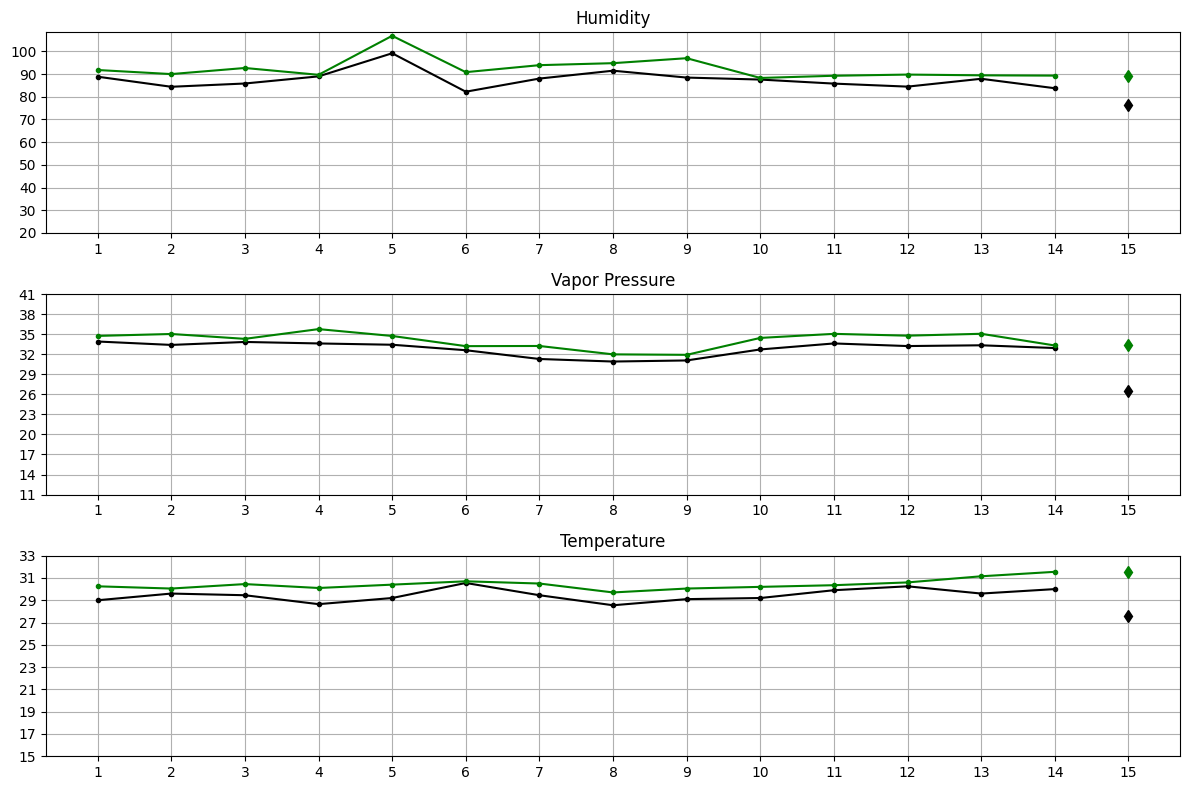

In [43]:
explain(data, model)

150/150 [==============================] - 1s 9ms/step
Root Mean Square Error Train:
 4.568492858440676
65/65 [==============================] - 1s 8ms/step
Root Mean Square Error Test:
 4.611823881988127
    index       CCI       MAE  index.1     CCI.1     MAE.1
0    6744  1.000000  0.473211     1841  0.352121  0.304575
1    6447  0.949990  0.506829     3697  0.374093  0.267785
2    6104  0.926356  0.513824     4809  0.383365  0.241105
3    5670  0.920444  0.491887     3257  0.392146  0.318216
4    1741  0.919793  0.483111     1099  0.401556  0.297968
5    4972  0.919789  0.465373     4349  0.403002  0.388419
6     225  0.919493  0.475584     3995  0.407915  0.326055
7    3889  0.909912  0.476766     1506  0.410679  0.228984
8    4643  0.905761  0.437775       14  0.412140  0.329896
9    1333  0.904259  0.465644      473  0.418147  0.393364
10   5354  0.899087  0.495920     2205  0.425984  0.344752
11   1002  0.895869  0.452547     6577  0.435851  0.306392
12   3554  0.890581  0.45806

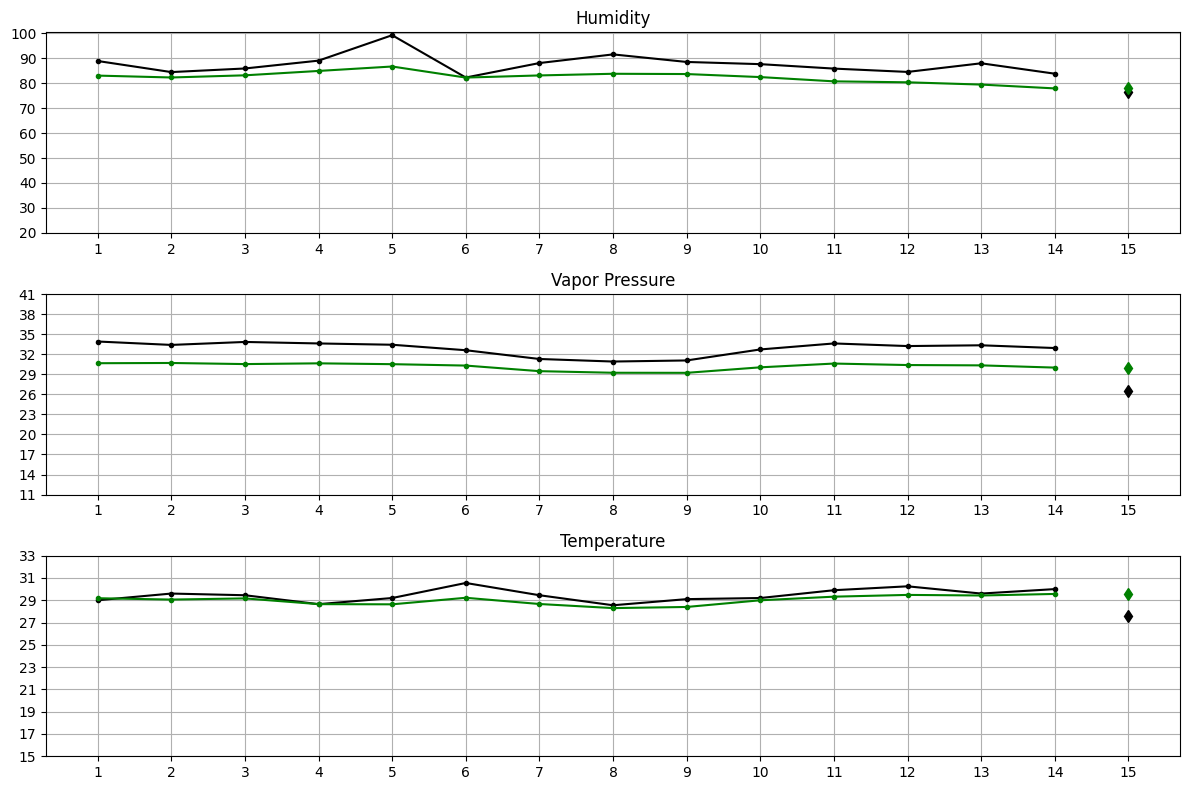

In [41]:
explain(data, model)

In [13]:
data

,DATE,TEMP_MAX,TEMP_MIN,TEMP_AVG,PRES_AVG,PRES_MAX,PRES_MIN,HUM_AVG,HUM_MAX,HUM_MIN
MONTH,,,,,,,,,,
JANUARY,2000-01-01,29.9,19.2,24.55,23.100000,25.300000,18.500000,80.000000,96.000000,55.000000
JANUARY,2000-01-02,31.6,21.0,26.30,24.900000,27.600000,23.200000,78.000000,93.000000,53.000000
JANUARY,2000-01-03,31.2,20.0,25.60,25.000000,29.300000,23.300000,83.000000,99.000000,54.000000
JANUARY,2000-01-04,30.8,18.8,24.80,24.500000,27.100000,22.800000,87.000000,99.000000,55.000000
JANUARY,2000-01-05,23.8,18.8,21.30,21.300000,23.200000,19.200000,87.000000,96.000000,72.000000
...,...,...,...,...,...,...,...,...,...,...
SEPTEMBER,2018-09-25,35.2,24.6,29.90,33.605244,39.293133,29.971286,85.807829,96.598891,66.220121
SEPTEMBER,2018-09-26,35.7,24.8,30.25,33.215072,38.461184,30.121252,84.474650,95.796130,65.107947
SEPTEMBER,2018-09-27,34.5,24.7,29.60,33.329421,39.033815,30.356106,87.932543,98.304236,71.282447
